<h1>Tarea semanal 11</h1>

<h3> Consignas </h3>

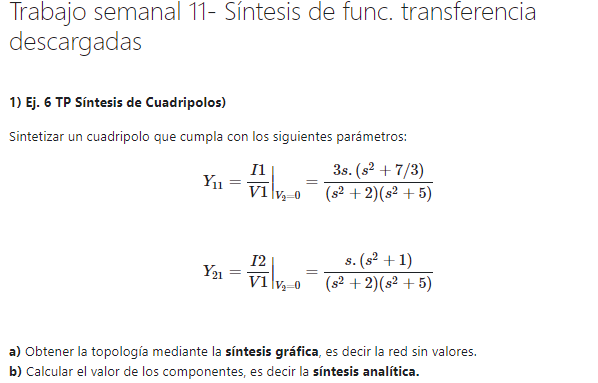

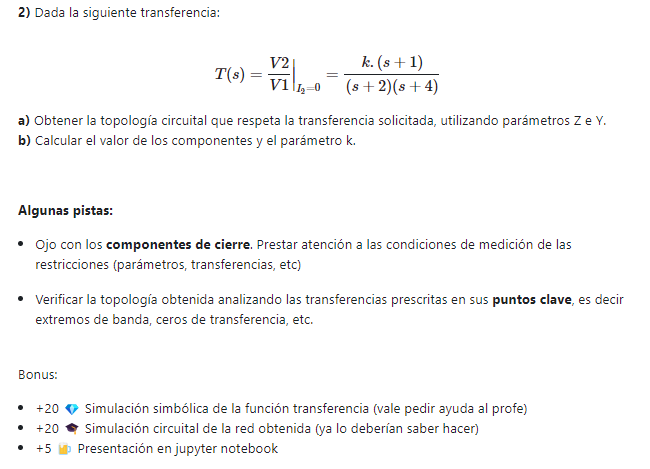

<h3> Resolucion de las consignas</h3>

Se adjunta el desarrollo hecho a mano:

<object data="Desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="Desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>


In [9]:
import sympy as sp
import numpy as np
from pytc2.remociones import remover_valor, remover_polo_sigma,remover_polo_jw,remover_polo_dc, remover_polo_infinito
from pytc2.dibujar import dibujar_tanque_derivacion,display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_espacio_derivacion, Resistor, Capacitor, Inductor,dibujar_tanque_RC_derivacion, dibujar_elemento_derivacion, Drawing

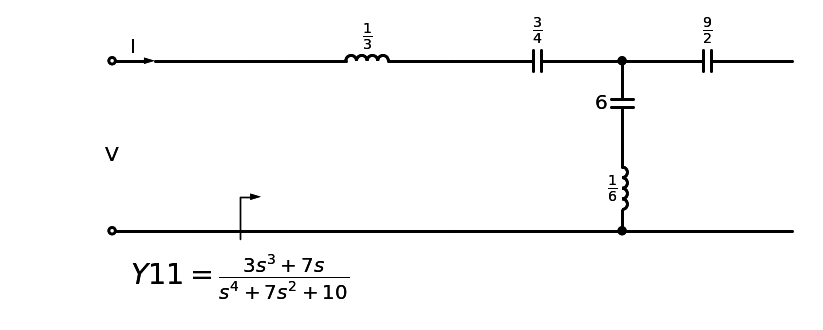

In [18]:

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Y11 = (3*s**3+7*s)/(s**4+7*s**2+10)

Z11 = 1/Y11
# Primer parametro cuadripolo sobrante, segundo parametro elemento removido
ZA, ZL1 = remover_polo_infinito(Z11)
L1 = ZL1 / s

# Remuevo parte del polo en jw = 0    
ZB, ZC1 = remover_polo_dc(ZA, omega_zero = 1)
C1 = 1/(ZC1*s)

# Paso a admitancia
YB = 1 / ZB

#Remuevo LC en derivacion
YC, Ytanque, L2, C2 = remover_polo_jw(YB, 1, isImpedance=False)

ZC = 1/YC

ZD, ZC3 = remover_polo_dc(ZC)

C3= 1/(ZC3 * s)
# Dibujo red:
circuito = Drawing(unit=4)
circuito = dibujar_puerto_entrada(circuito, voltage_lbl = ('V'), current_lbl = 'I')
circuito, zz_lbl = dibujar_funcion_exc_abajo(circuito, 'Y11', Y11, hacia_salida = True,k_gap_width = 0.5)
circuito = dibujar_elemento_serie(circuito, Inductor, L1)
circuito = dibujar_elemento_serie(circuito, Capacitor, C1)
circuito = dibujar_tanque_derivacion(circuito, L2, C2)
circuito = dibujar_elemento_serie(circuito, Capacitor, C3)
display(circuito)